In [ ]:
#Sentiment_vs_4d_PriceChange

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Qasim2004",
    database="stock_news"
)
cursor = conn.cursor(dictionary=True)

# Query headlines, get data, sentiment score, and price change percentage after 4 days
query = """
SELECT date, price_change_pct_4d, sentiment_score
FROM headlines
WHERE price_change_pct_4d IS NOT NULL AND sentiment_score IS NOT NULL
ORDER BY date ASC
"""
df = pd.read_sql(query, conn)
conn.close()

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

df.head()


/var/folders/8n/rfbb5wx545s1sgtlncggpk240000gn/T/ipykernel_63577/1096184555.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,date,price_change_pct_4d,sentiment_score
0,2025-06-11 16:47:30,-3.02,1
1,2025-06-11 16:47:30,-1.74,1
2,2025-06-11 16:47:30,-2.22,0
3,2025-06-11 16:47:30,0.81,-2
4,2025-06-11 16:47:30,-0.30,0


In [4]:
!pip3 install seaborn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


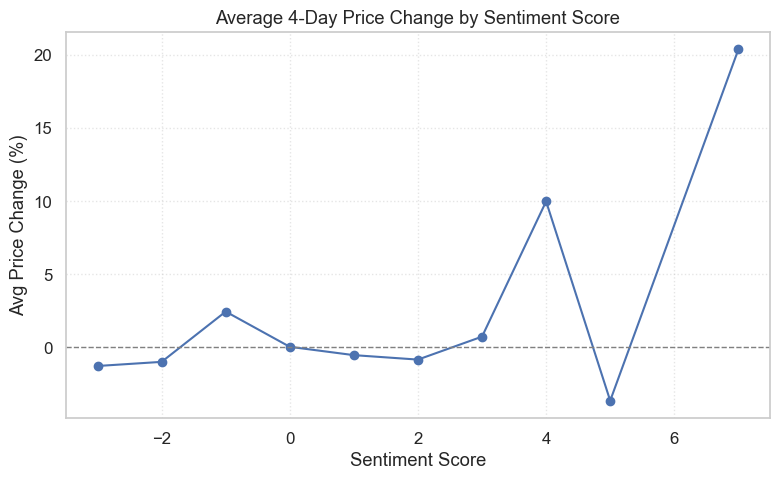

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by sentiment score and calculate the mean price change
avg_change = df.groupby('sentiment_score')['price_change_pct_4d'].mean().reset_index()

# Sort by sentiment score to keep line smooth
avg_change = avg_change.sort_values(by='sentiment_score')

# Plot the line graph
plt.figure(figsize=(8, 5))
plt.plot(avg_change['sentiment_score'], avg_change['price_change_pct_4d'], marker='o', linestyle='-')
plt.title("Average 4-Day Price Change by Sentiment Score")
plt.xlabel("Sentiment Score")
plt.ylabel("Avg Price Change (%)")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


This plot shows the average percentage change in stock price over 4 days, grouped by each sentiment score from the headlines.

theres a bit of noise in the middle scores like 0 or 1, which may reflect neutral or mixed headlines.

This chart is an initial first step in seeing whether my sentiment model actually has predictive value or not.



